# Pandas
In this notebook, we'll encounter a very useful package for scientific computing in Python: Pandas. We can think of Pandas as "numpy with labels". This package is especially useful for data science and biology for a few reasons:
* Great for real-world, heterogeneous data
* Similar to Excel spreadsheets (but way faster!)
* Smartly deals with missing data

### At the end of this notebook, you'll be able to:
* Create & manipulate Pandas dataframes
* Load a tabular file of genetic data into a Pandas dataframe
* Index and subset Pandas dataframes
* Generate descriptive statistics for Pandas dataframes
<hr>

## Importing packages

Before we can pandas, we need to import it. The convention is to import `pandas` as `pd`.

In [ ]:
# Import packages
import pandas as pd

# Use whos 'magic command' to see available modules
%whos

## Create and Manipulate Dataframes 
The two data structures of Pandas are the `Series` and the `DataFrame`. A `Series` is a one-dimensional onject similar to a list. A `DataFrame` can be thought of as a two-dimensional numpy array or a collection of `Series` objects. Series and dataframes can contain multiple different data types such as integers, strings, and floats, similar to an Excel spreadsheet. Pandas also supports `string` lables unlike numpy arrays which only have numeric labels for their rows and columns. For a more in depth explanation, please visit the [Introduction to Data Structures](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html) section in the Pandas User Guide. 

You can create a Pandas dataframe by inputting dictionaries into the Pandas function `pd.DataFrame()`, by reading files, or through functions built into the Pandas package. The function [`pd.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) reads a comma- or tab-separated file and returns it as a `dataframe`.

### Creating a data from a dictionary

Below, we'll create a dataframe from a dictionary. Since this is quite a bit to fit into one cell, we're also using a trick where we use a pair of open parentheses to tell Python to *ignore* the line breaks here.

In [ ]:
# Create the dictionary
students = (
  {'FIRST_NAME': ['Daniel', 'Ben', 'Kavita', 'Linda',
                  'Omar','Jane', 'Felicia', 'Rachel',
                  'Bob'],
   'LAST_NAME': ['Smith', 'Leibstrom', 'Kanabar', 'Thiel',
                 'Reichel', 'OConner', 'Rao', 'Crock',
                 'McDonald'],
   'YEAR': [1, 1, 1, 4, 2, 2, 3, 1, 1],
   'HOME_STATE': ['NY', 'NY', 'PA', 'CA', 'OK', 'HI',
                  'NY','FL', 'FL'],
   'AGE': [18, 19, 19, 22, 21, 19, 20, 17, 18],
   'CALC_101_FINAL': [90, 80, None, 60, 70, None, None,
                      None, 98],
   'ENGLISH_101_FINAL': [80, None, None, 40, 50, None,
                         None, 60, 65]} )

# Create the dataframe from our dictionary
students_df = pd.DataFrame(students)
students_df

We can access a list of all of the students' last names using the following notation: `df['column_name']`.

In [ ]:
# Access LAST_NAME column
lastnames = students_df['LAST_NAME']
lastnames

One column of the dataframe is a **series**.

In [ ]:
# Check type of column
lastnames_list = list(lastnames)
print(lastnames_list)
type(lastnames_list)

### Reading from a file example
Below we will create a dataframe by reading the file `brainarea_vs_genes_exp_w_reannotations.tsv` which contains information on gene expression accross multiple brain areas. we'll use the `read_csv` function to import our gene expression data as a DataFrame.

>**About this dataset:**
This dataset was created by Derek Howard and Abigail Mayes for the purpose of accelerating advances in data mining of open brain transcriptome data for polygenetic brain disorders. The data comes from normalized microarray datasets of gene expression from 6 adult human brains that was released by the Allen Brain Institute and then processed into the dataframe we will see below. For more information on this dataset please visit the <a href = "https://github.com/derekhoward/HBAsets"> HBAsets repository</a>. 

Below, we'll use the `read_csv()` function to import our gene expression data as a **data frame**.

In [ ]:
# Read in the list of lists as a data frame
# Note "delimiter" from loadtxt is "sep" here
gene_df = pd.read_csv('Data/brainarea_vs_genes_exp_w_reannotations.tsv',sep='\t')

#Show the first five rows
gene_df.head(10)

At the moment, the first column  of information above, called the **index**, just contains a list of numbers.

> **Task**: Reassign the row labels by using the method `set_index()` on our dataframe. We can choose any column in our present dataframe to be the row values -- let's assign the row lables to be the `gene_symbol` and re-assign the dataframe. 

**Question for consideration**: Does `set_index()` work in place

In [ ]:
row_index = 'gene_symbol'
gene_df = gene_df.set_index(row_index)
gene_df.head()

It would help to know what information is in our dataset. In other words, what is across the columns at the top?

> **Task** Show a list of columns by accessing the `columns` attribute of our dataframe.

In [ ]:
# Access the columns of our dataframe 
# We can use list to avoid truncation
list(gene_df.columns)

## Indexing Dataframes

Indexing in Pandas works slightly different than in NumPy. Similar to a dictionary, we can index dataframes by their names. 

The syntax for indexing **single locations** in a dataframe is `dataframe.loc[row_label,column_label]`.

To index an **individual column**, we use the shorthand syntax `dataframe[column_label]`.

To index an **individual row**, we use the syntax `dataframe.loc[row_label]`.

To index by **index #**, we use the syntax `dataframe.iloc[index_number]`.

Below are some examples on how to access rows, columns, and single values in our dataframe. For more information on indexing dataframes, visit the <a href = "https://pandas.pydata.org/docs/user_guide/indexing.html#indexing"> "Indexing and selecting data"</a> section in the Pandas User Guide.

> **Task**: Try each of these forms of indexing below. Can you use this syntax to get multiple values (a slice or subset) of the dataframe as well?

In [ ]:
list(gene_df.index)

In [ ]:
# Select a single location
gene_df.loc['A2ML1','Crus I, lateral hemisphere']

In [ ]:
# Select a single column
gene_df['CA1 field']

In [ ]:
# Select a single row
gene_df.loc['A2M']

In [ ]:
# Select a single index
# Hint: You can show all indices using gene_df.index
gene_df.iloc[1]

To select multiple different columns, you can use a `list` of all your columns of interest as so:

In [ ]:
# Dataframe w/ only CA field entries 
CA_field_df = gene_df[['CA1 field', 
                       'CA2 field', 
                       'CA3 field', 
                       'CA4 field']]
CA_field_df.head()

## Subsetting dataframes

Like NumPy arrays, we can subset our original dataframe to only include data that meets our criteria. Our dataframe has data on multiple different brain areas with many gene expression values. You can filter this dataframe using the following syntax:
```
new_df = original_df[original_df['Column of Interest'] == 'Desired Value']
```
In plain english, what this is saying is: save a dataframe from the original dataframe, where the original dataframe values in my Column of Interest are equal to my Desired Value. For more information on subsetting,  visit the <a href = "https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html"> "How do I select a subset of a DataFrame"</a> section in the Pandas documentation. 

Below we will demonstrate how to execute this by taking a look at the `CA1 field` column in `gene_df`. We will create a dataframe from `gene_df` that only contains genes that showed a certain level of gene expression. 

In [ ]:
gene_df['CA1 field'] > 1.7

In [ ]:
# Create a dataframe with only genes that have an expression 
# value greater than 1.7 in 'CA1 field' 

high_CA1 = gene_df[gene_df['CA1 field'] > 1.7]
high_CA1

## DataFrame Methods

Pandas has many useful methods that you can use on your data, including `describe`, `mean`, and more. To learn more about all the different methods that can be used to manipulate and analyze dataframes, please visit the <a href = "https://pandas.pydata.org/docs/user_guide/index.html"> Pandas User Guide </a>. We will demonstrate some of these methods below. 

The `describe` method returns descriptive statistics of all the columns in our dataframe. 

In [ ]:
gene_df.describe()

The `mean` and `std` method return the mean and standard deviation of each column in the dataframe, respectfully. 

In [ ]:
# Try df.mean()
gene_df.mean(axis=1)

In [ ]:
# Try df.std()
gene_df.std()

## Merging & joining dataframes

Let's say we have two different dataframes and we would like to combine the two into one single dataframe. We can use either the `merge` or `join` Pandas methods in order to pull all of this data into one dataframe. 

![](http://www.datasciencemadesimple.com/wp-content/uploads/2017/09/join-or-merge-in-python-pandas-1.png)

There are different types of joins/merges you can do in Pandas, illustrated <a href="http://www.datasciencemadesimple.com/join-merge-data-frames-pandas-python/">above</a>. Here, we want to do an **inner** merge, where we're only keeping entries with indices that are in both dataframes. We could do this merge based on columns, alternatively.

**Inner** is the default kind of join, so we do not need to specify it. And by default, join will use the 'left' dataframe, in other words, the dataframe that is executing the `join` method.

If you need more information, look at the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html">join</a> and <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html">merge</a> documentation: you can use either of these to unite your dataframes, though join will be simpler!

Below is an example of how to join two separate dataframe into one, unified dataframe. We start with one dataframe with only entries from the *temporal pole* and another dataframe with only entries from the CA fields of the hippocampus. We can then join the two dataframes together using the syntax `unified_df = df_1.join(df_2)`

In [ ]:
# Dataframe w/ only Temporal Pole entries 
temporal_pole_df = gene_df[['temporal pole, inferior aspect', 
                            'temporal pole, medial aspect', 
                            'temporal pole, superior aspect']]
temporal_pole_df.head()

In [ ]:
# Join the two dataframes
df_1 = temporal_pole_df
df_2 = CA_field_df

unified_df = df_1.join(df_2)
unified_df.head()

<hr>

## Group Task
### *Does the number of neurons in the cortex scale with cortex size?*
In this final task, we'll look at [this dataset](http://www.suzanaherculanohouzel.com/2015-h-h-et-al-bbe-database/) to figure out whether the number of neurons in the cortex scales with cortex size, and if this scaling is different for primates.  

To complete this task, do the following steps in a separate notebook:

1. Use `pd.read_csv()` to read in our comma-delimited file 'Data/species_brainmass_neurons.csv' and assign it to a dataframe called `brains_df`.
2. Separate the dataframe into two dataframes: one that contains all of the primates (`primate_df`; 'Order' is Primata) and one that contains all of the data that are *not* from primates (`nonprimate_df`). **Hint**: You can subset the dataframe by using the syntax `brains_df[brains_df['Order']=='Primata']`.
3. Using two separate, subsequent calls to `plt.scatter()` for primates and then non-primates, create a scatterplot with `cortex_mass` on the x axis and `neurons` on the y axis.
6. Label your axes.
7. (Optional) log scale your axes using `plt.xscale('log')` and `plt.yscale('log')`.

In [2]:
import pandas as pd

brains_df = pd.read_csv('Data/species_brainmass_neurons.csv',sep=',')
brains_df.head()

,Species,Order,cortex_mass_g,Neurons,Other_cells,Neurons_mg,Other_cells_mg,Source
0,Sorex fumeus,Eulipotyphla,0.084,9730000,9290000,116727,111754,"Sarko et al., 2009"
1,Mus musculus,Glires,0.173,13688162,12061838,78672,68643,"Herculano-Houzel et al., 2006"
2,Blarina brevicauda,Eulipotyphla,0.197,11876000,15820000,60214,80729,"Sarko et al., 2009"
3,Heterocephalus glaber,Glires,0.184,6151875,8398125,33374,45894,"Herculano-Houzel et al., 2011"
4,Condylura cristata,Eulipotyphla,0.420,17250000,32010000,40777,76995,"Sarko et al., 2009"


In [9]:
primate_df = brains_df[brains_df['Order']=='Primata']
nonprimate_df = brains_df[brains_df['Order']!='Primata']
print('# primate observations: ', len(primate_df))
print('# non primate observations: ', len(nonprimate_df))

# primate observations:  11
# non primate observations:  27


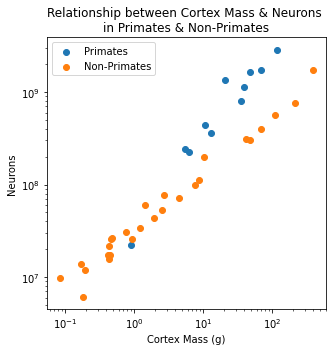

In [6]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1,figsize=(5,5))
plt.scatter(primate_df['cortex_mass_g'],primate_df['Neurons'])
plt.scatter(nonprimate_df['cortex_mass_g'],nonprimate_df['Neurons'])
plt.xlabel('Cortex Mass (g)')
plt.ylabel('Neurons')
plt.title('Relationship between Cortex Mass & Neurons \nin Primates & Non-Primates')
plt.xscale('log')
plt.yscale('log')
plt.legend(['Primates','Non-Primates'])
plt.show()

<hr>

## Additional resources
See the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html) for a more in depth exploration of Pandas, and of course, the [Pandas documentation](https://pandas.pydata.org/docs/user_guide/index.html).